# WeatherPy
----

### Analysis
* As expected, temperature rises the closer you get to the equator. However the drop off from the equator high temperatures was sharper moving North than South.
* There is no discernible correlation between latitude and cloudiness.
* The same goes for wind speed, although there appears to be some correlation at the far ends of the spectrum of latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

# Set wrapper
settings = {"units": "metric", "appid": api_key}

In [4]:
# set up list to hold data, set index to 0
data = []
i = 0


# Loop through cities to request data from owm for each, with exception handling for cities not found in owm api
for city in cities:
    query_url = f"{url}appid={api_key}&q={city}"
    
    try:
        response = owm.get_current(city, **settings)
        data.append(response)
    
        print(f'Processing Record {i} of {len(cities)} | {city}')
        i += 1

    except:
        print('City not found.')
        i += 1

Processing Record 0 of 644 | ushuaia
Processing Record 1 of 644 | beringovskiy
Processing Record 2 of 644 | hobart
Processing Record 3 of 644 | rikitea
Processing Record 4 of 644 | bambous virieux
Processing Record 5 of 644 | lorengau
Processing Record 6 of 644 | sola
Processing Record 7 of 644 | poum
Processing Record 8 of 644 | chazuta
Processing Record 9 of 644 | adur
Processing Record 10 of 644 | avera
Processing Record 11 of 644 | yagodnoye
Processing Record 12 of 644 | iqaluit
Processing Record 13 of 644 | new norfolk
Processing Record 14 of 644 | sao miguel
Processing Record 15 of 644 | acobamba
Processing Record 16 of 644 | jamestown
Processing Record 17 of 644 | pervomayskoye
Processing Record 18 of 644 | gusau
Processing Record 19 of 644 | puerto ayora
Processing Record 20 of 644 | arraial do cabo
Processing Record 21 of 644 | kapaa
Processing Record 22 of 644 | zhigansk
Processing Record 23 of 644 | kumba
Processing Record 24 of 644 | byron bay
Processing Record 25 of 644 | 

Processing Record 222 of 644 | sterling
Processing Record 223 of 644 | yanam
Processing Record 224 of 644 | aksarka
Processing Record 225 of 644 | takoradi
Processing Record 226 of 644 | atar
Processing Record 227 of 644 | shahgarh
Processing Record 228 of 644 | sandwick
Processing Record 229 of 644 | martinez
Processing Record 230 of 644 | saint-augustin
Processing Record 231 of 644 | half moon bay
Processing Record 232 of 644 | beyneu
Processing Record 233 of 644 | ilulissat
Processing Record 234 of 644 | kapit
Processing Record 235 of 644 | nikolskoye
Processing Record 236 of 644 | dickinson
City not found.
City not found.
Processing Record 239 of 644 | przhevalskoye
Processing Record 240 of 644 | witu
Processing Record 241 of 644 | carlyle
Processing Record 242 of 644 | te anau
Processing Record 243 of 644 | cap malheureux
Processing Record 244 of 644 | maswa
Processing Record 245 of 644 | pitrufquen
City not found.
Processing Record 247 of 644 | gushikawa
Processing Record 248 of 

City not found.
Processing Record 443 of 644 | dunedin
Processing Record 444 of 644 | kalemie
Processing Record 445 of 644 | rockport
Processing Record 446 of 644 | kamenka
Processing Record 447 of 644 | necochea
Processing Record 448 of 644 | alpena
Processing Record 449 of 644 | jais
Processing Record 450 of 644 | hare bay
Processing Record 451 of 644 | linhai
Processing Record 452 of 644 | agirish
Processing Record 453 of 644 | bure
Processing Record 454 of 644 | aguimes
Processing Record 455 of 644 | zorritos
Processing Record 456 of 644 | pemba
Processing Record 457 of 644 | north platte
Processing Record 458 of 644 | smidovich
Processing Record 459 of 644 | isabela
Processing Record 460 of 644 | bathsheba
Processing Record 461 of 644 | olinda
Processing Record 462 of 644 | amapa
Processing Record 463 of 644 | homer
Processing Record 464 of 644 | coihaique
Processing Record 465 of 644 | fairburn
City not found.
City not found.
Processing Record 468 of 644 | tiznit
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create dataframe from data
cityweather = pd.DataFrame(data)

# Filter down to just the necessary columns
cityweather = cityweather[['name', 'coord', 'dt', 'main', 'clouds', 'wind']]
cityweather.head()

,name,coord,dt,main,clouds,wind
0,Ushuaia,"{'lon': -68.31, 'lat': -54.81}",1554598800,"{'temp': 2, 'pressure': 990, 'humidity': 100, ...",{'all': 90},"{'speed': 3.1, 'deg': 230}"
1,Beringovskiy,"{'lon': 179.32, 'lat': 63.05}",1554602052,"{'temp': -9.62, 'pressure': 1007.39, 'humidity...",{'all': 64},"{'speed': 12.01, 'deg': 4.50351}"
2,Hobart,"{'lon': 147.33, 'lat': -42.88}",1554601875,"{'temp': 18.49, 'pressure': 1008, 'humidity': ...",{'all': 75},"{'speed': 6.2, 'deg': 360}"
3,Rikitea,"{'lon': -134.97, 'lat': -23.12}",1554602052,"{'temp': 25.59, 'pressure': 1015.51, 'humidity...",{'all': 56},"{'speed': 5.81, 'deg': 107.504}"
4,Bambous Virieux,"{'lon': 57.76, 'lat': -20.34}",1554602040,"{'temp': 26.24, 'pressure': 1016, 'humidity': ...",{'all': 75},"{'speed': 5.1, 'deg': 130}"


In [13]:
# Many of the fields are actually dictionary values grouped under a single parent column in the dataframe
# Extract the dictionaries containing temp, wind speed, humidity, cloud % and latitude, then set each to lists
coord = cityweather['coord'].tolist()
main = cityweather['main'].tolist()
clouds = cityweather['clouds'].tolist()
wind = cityweather['wind'].tolist()

# Create dataframes from those lists
coord_df = pd.DataFrame(coord)
main_df = pd.DataFrame(main)
clouds_df = pd.DataFrame(clouds)
wind_df = pd.DataFrame(wind)

# The original dataframe needs to be stripped down to fundamental info fields to be ready to merge with new dataframes
# Create list with name and datetime fields
citynames_list = cityweather.loc[:, ['name', 'dt']]
# Set list of names and datetimes to new dataframe
citynames = pd.DataFrame(citynames_list)

# merge new DFs, names df
coordmain = coord_df.join(main_df, how='outer')
coordmainclouds = coordmain.join(clouds_df, how='outer')
coordmaincloudswind = coordmainclouds.join(wind_df, how='outer')
citiesweather = coordmaincloudswind.join(citynames, how='outer')

citiesweather = citiesweather.loc[:, ['name', 'dt', 'lat', 'temp', 'humidity', 'all', 'speed']]
citiesweather.head(50)

,name,dt,lat,temp,humidity,all,speed
0,Ushuaia,1554598800,-54.81,2.00,100,90,3.10
1,Beringovskiy,1554602052,63.05,-9.62,98,64,12.01
2,Hobart,1554601875,-42.88,18.49,45,75,6.20
3,Rikitea,1554602052,-23.12,25.59,100,56,5.81
4,Bambous Virieux,1554602040,-20.34,26.24,69,75,5.10
5,Lorengau,1554602035,-2.02,29.74,92,48,3.21
6,Sola,1554601819,58.89,4.13,93,0,1.00
7,Poum,1554602053,41.28,-0.27,90,0,0.76
8,Chazuta,1554598800,-6.57,17.00,290,90,0.36
9,Adur,1554598800,41.12,10.00,93,90,0.71


In [15]:
# create csv from dataframe
cityweather_csv = citiesweather.to_csv('weather.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

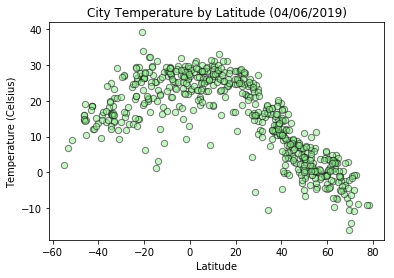

In [30]:
plt.title('City Temperature by Latitude (04/06/2019)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Celsius)')

plt.scatter(citiesweather['lat'], citiesweather['temp'], s=40, marker='o', edgecolor='black', color='lightgreen', alpha=0.5)

plt.savefig('../output/temp.png')

#### Latitude vs. Humidity Plot

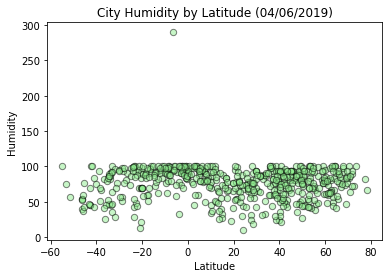

In [33]:
plt.title('City Humidity by Latitude (04/06/2019)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.scatter(citiesweather['lat'], citiesweather['humidity'], s=40, marker='o', edgecolor='black', color='lightgreen', alpha=0.5)

plt.savefig('../output/humidity.png')

#### Latitude vs. Cloudiness Plot

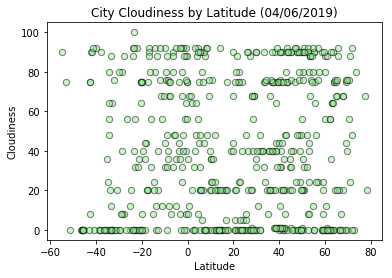

In [34]:
plt.title('City Cloudiness by Latitude (04/06/2019)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.scatter(citiesweather['lat'], citiesweather['all'], s=40, marker='o', edgecolor='black', color='lightgreen', alpha=0.5)

plt.savefig('../output/cloudiness.png')

#### Latitude vs. Wind Speed Plot

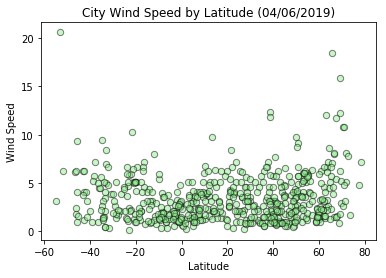

In [35]:
plt.title('City Wind Speed by Latitude (04/06/2019)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.scatter(citiesweather['lat'], citiesweather['speed'], s=40, marker='o', edgecolor='black', color='lightgreen', alpha=0.5)

plt.savefig('../output/windspeed.png')